In [69]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [70]:
subprocess.check_output(["make"])

b"make: Nothing to be done for `all'.\n"

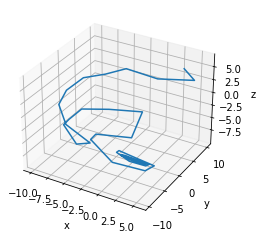

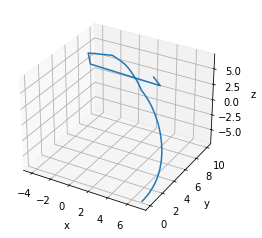

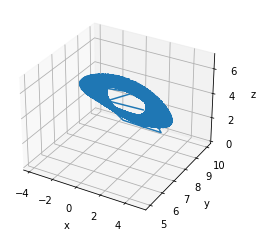

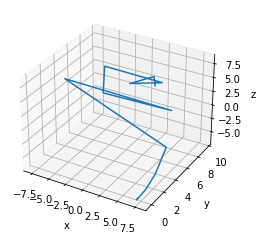

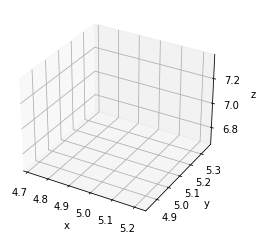

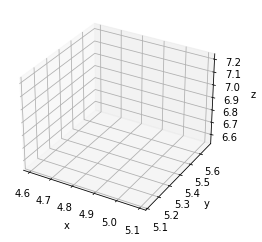

In [74]:
windspeeds=[1, 5, 10, 20, 50, 100] #m/s
for windspeed in windspeeds:
    fig=plt.figure()
    ax = fig.add_subplot(111, projection = '3d')
    theta=[]
    phi=[]
    r=[]
    position_list=subprocess.check_output(["./main.x", "%d"%windspeed]).decode()
    position_list=position_list.split("\n")
    for line in position_list:
        line=line.split(' ')
        try:
            theta.append(float(line[4]))
            phi.append(float(line[5]))
            r.append(float(line[6]))
        except:
            i=1
    theta=np.array(theta)
    phi=np.array(phi)
    r=np.array(r)
    x=np.multiply(r, np.multiply(np.sin(theta), np.cos(phi)))
    y=np.multiply(r, np.multiply(np.sin(theta), np.sin(phi)))
    z=np.multiply(r, np.cos(theta))
    ax.plot(x, y, z)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    plt.show()